In [67]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [14]:
df = pd.read_csv('./dataset/checkpoint.csv', index_col='id')
df = df[(df.following > 0) & (~df.following_ids.isnull())]
df.head()

,username,profile_image_url,name,followers,following,following_ids,log_ratio
id,,,,,,,
1048283702697086979,stedile_mst,https://pbs.twimg.com/profile_images/143314650...,João Pedro Stedile,53921,1,76699270,10.202128
1030198380868321280,FHC,https://pbs.twimg.com/profile_images/103020226...,Fernando Henrique Cardoso,333169,1,2688070376,12.023258
260419394,rafaellacava10,https://pbs.twimg.com/profile_images/899720067...,Rafael Lacava,414043,5,"49751816,128262354,461922813,1252764865,15007299",11.141966
144927419,citaconsilvio,https://pbs.twimg.com/profile_images/908194706...,Silvio Rodríguez,167021,6,"1252764865,199064053,371783889,82114479,140996...",10.079965
185757079,ConTeodoro,https://pbs.twimg.com/profile_images/125872131...,Teodoro Petkoff,51835,6,"342363193,73509536,252417868,70689901,86434802...",8.909911


In [15]:
def prepare_data(df):
    available_ids = df.index
    info = {}
    ntx = {}
    for index, row in df.iterrows():
        info[index] = {
            'username': row['username'],
            'name': row['name'],
            'profile_image_url': row['profile_image_url'],
            'followers': row['followers'],
            'following': row['following'],
            'log_ratio': row['log_ratio'],
        }
        
        ntx[index] = [int(i) for i in row['following_ids'].split(',') if int(i) in available_ids]
    
    return info, ntx

In [16]:
info, ntx = prepare_data(df)

In [23]:
dg = nx.DiGraph(ntx)

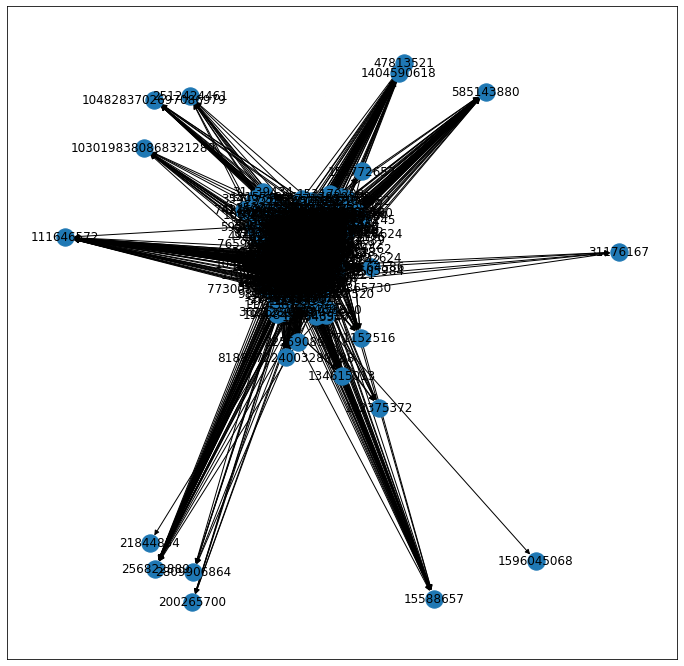

In [28]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx(dg)
plt.show()

In [56]:
info_df = pd.DataFrame.from_dict(info).T

In [59]:
gg = pd.DataFrame({
    'degree': dict(nx.degree(dg, weight=None)),
    'pagerank': dict(nx.pagerank(dg, weight=None)),
    'betweenness_centrality': dict(nx.betweenness_centrality(dg, weight=None)),
    })

In [127]:
info_df[['username','name']].join(gg).sort_values('betweenness_centrality', ascending=False).head(100)
#gg.sort_values('degree', ascending=False).head(50)

,username,name,degree,pagerank,betweenness_centrality
47491330,hcapriles,Henrique Capriles R.,716,0.007245,0.078836
102482331,MariaCorinaYA,María Corina Machado,651,0.006487,0.064419
138212728,jaarreaza,Jorge Arreaza M,388,0.004733,0.044795
39176902,jguaido,Juan Guaidó,488,0.007431,0.022899
128262354,dcabellor,Diosdado Cabello R,279,0.004644,0.020627
342363193,VillegasPoljak,Ernesto Villegas Poljak,348,0.002880,0.020162
75883996,AlbertoRavell,Alberto Ravell,549,0.003889,0.018268
72627916,carlaangola,Carla Angola TV,554,0.003325,0.016096
2670726740,LulaOficial,Lula,182,0.007818,0.013556
1644228493,delcyrodriguezv,Delcy Rodríguez,317,0.003731,0.013069


In [71]:
nx.voterank(dg)

[47491330,
 102482331,
 177624791,
 72627916,
 165257778,
 73509536,
 1045257214670368768,
 76119597,
 75883996,
 98776227,
 63847576,
 63232755,
 79289858,
 501885201,
 41626835,
 40468522,
 63306116,
 95433643,
 53678101,
 476940572,
 138212728,
 60957050,
 67806312,
 344790610,
 68695483,
 129858259,
 106904370,
 84195118,
 342363193,
 63561038,
 84725346,
 76947892,
 64784342,
 376186166,
 33058307,
 73672296,
 64252221,
 138118786,
 108722247,
 57738199,
 1644228493,
 77054564,
 18661011,
 67022569,
 72690865,
 113733516,
 103692474,
 624995677,
 44226386,
 75176647,
 1666322623,
 248010159,
 109057415,
 114335663,
 137921220,
 137849206,
 173862310,
 39176902,
 181576655,
 166671460,
 43105334,
 58694945,
 128262354,
 57379186,
 66818337,
 139406894,
 81839105,
 3416035889,
 220055314,
 112344258,
 85970661,
 88566476,
 166207311,
 37287124,
 95568503,
 929838427,
 1301761278,
 93915832,
 183340468,
 1267909802,
 80837321,
 200932969,
 45589098,
 138591691,
 7833422,
 102128973,


In [74]:
info[165257778]

{'username': 'albacmujica',
 'name': 'Alba Cecilia Mujica',
 'profile_image_url': 'https://pbs.twimg.com/profile_images/1100511804369846272/_NWGrgy-_normal.jpg',
 'followers': 174453,
 'following': 2998,
 'log_ratio': 4.063376464622603}

In [75]:
df

,username,profile_image_url,name,followers,following,following_ids,log_ratio
id,,,,,,,
1048283702697086979,stedile_mst,https://pbs.twimg.com/profile_images/143314650...,João Pedro Stedile,53921,1,76699270,10.202128
1030198380868321280,FHC,https://pbs.twimg.com/profile_images/103020226...,Fernando Henrique Cardoso,333169,1,2688070376,12.023258
260419394,rafaellacava10,https://pbs.twimg.com/profile_images/899720067...,Rafael Lacava,414043,5,"49751816,128262354,461922813,1252764865,15007299",11.141966
144927419,citaconsilvio,https://pbs.twimg.com/profile_images/908194706...,Silvio Rodríguez,167021,6,"1252764865,199064053,371783889,82114479,140996...",10.079965
185757079,ConTeodoro,https://pbs.twimg.com/profile_images/125872131...,Teodoro Petkoff,51835,6,"342363193,73509536,252417868,70689901,86434802...",8.909911
...,...,...,...,...,...,...,...
157202279,elsemblante,https://pbs.twimg.com/profile_images/143543695...,Celso Tete Crespo 🇨🇴,104887,15403,"770083928,83368327,1447140823393468424,1436829...",1.918256
144226837,fornerinojl,https://pbs.twimg.com/profile_images/137777527...,José Luis López Fornerino,59344,19871,"94324983,135129478,940153657,177153502,1422222...",1.094039
128262354,dcabellor,https://pbs.twimg.com/profile_images/134671265...,Diosdado Cabello R,2558540,23185,"1439221141529374725,1441791376287404043,141276...",4.703643


In [76]:
starting_nodes = [
    1252764865, # Nicolas Maduro
    128262354, # Diosdado Cabello
    1644228493, # Delcy Rodriguez
    14119371, # Julio Borges
    47491330, # Henrique Capriles
    102482331, # Maria Corina Machado
]

initial_nodes = df.loc[starting_nodes]
initial_nodes

,username,profile_image_url,name,followers,following,following_ids,log_ratio
id,,,,,,,
1252764865,NicolasMaduro,https://pbs.twimg.com/profile_images/116656018...,Nicolás Maduro,3979281,115,"1402349288257200136,126469834,133373873,313720...",10.443022
128262354,dcabellor,https://pbs.twimg.com/profile_images/134671265...,Diosdado Cabello R,2558540,23185,"1439221141529374725,1441791376287404043,141276...",4.703643
1644228493,delcyrodriguezv,https://pbs.twimg.com/profile_images/138467706...,Delcy Rodríguez,575341,663,"360671330,1047189108005720065,1283946933069938...",6.764436
14119371,JulioBorges,https://pbs.twimg.com/profile_images/120776180...,Julio Borges,1580575,98503,"1380954507903967232,939091,30354991,53144987,5...",2.775447
47491330,hcapriles,https://pbs.twimg.com/profile_images/378800000...,Henrique Capriles R.,7107479,1984,"772150676919054340,268860147,1584726798,146976...",8.183284
102482331,MariaCorinaYA,https://pbs.twimg.com/profile_images/126529917...,María Corina Machado,4315599,4480,"777207848271052801,374699026,488807181,1229845...",6.870145


In [119]:
oficialismo_folowing = set(int(i) for i in ','.join(initial_nodes.iloc[:3].following_ids.values).split(','))
oposicion_folowing = set(int(i) for i in  ','.join(initial_nodes.iloc[3:].following_ids.values).split(','))
neutral_following = oposicion_folowing.intersection(oficialismo_folowing)
oficialismo_folowing = oficialismo_folowing - neutral_following
oposicion_folowing = oposicion_folowing - neutral_following

In [120]:
print(len(oficialismo_folowing))
print(len(oposicion_folowing))
print(len(neutral_following))

10445
15534
67


In [123]:
# Veamos quienes pasaron el filtrado
available_ids = set(df.index)
print( len(available_ids.intersection(oficialismo_folowing)) )
print( len(available_ids.intersection(oposicion_folowing)) )

202
508
